# Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples 
and 14 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [19]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

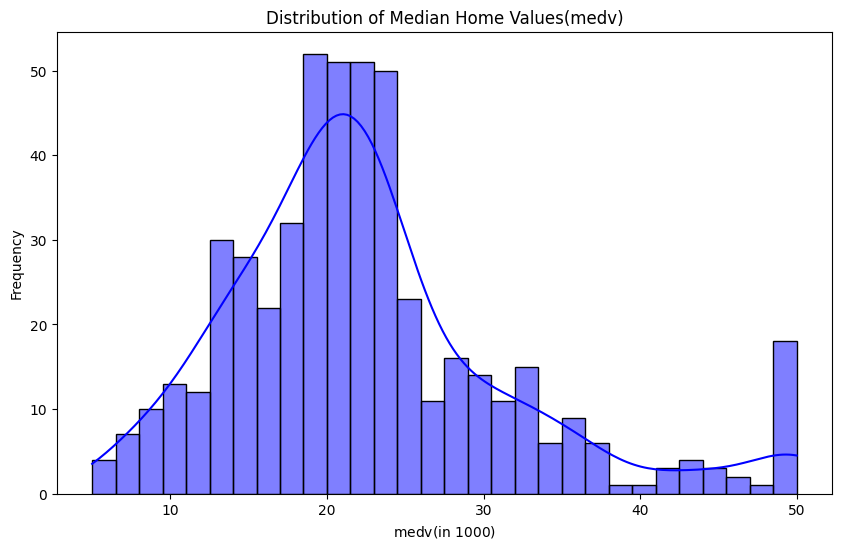

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['medv'],bins=30, kde=True, color='blue')
plt.title('Distribution of Median Home Values(medv)')
plt.xlabel('medv(in $1000$)')
plt.ylabel('Frequency')
plt.show()

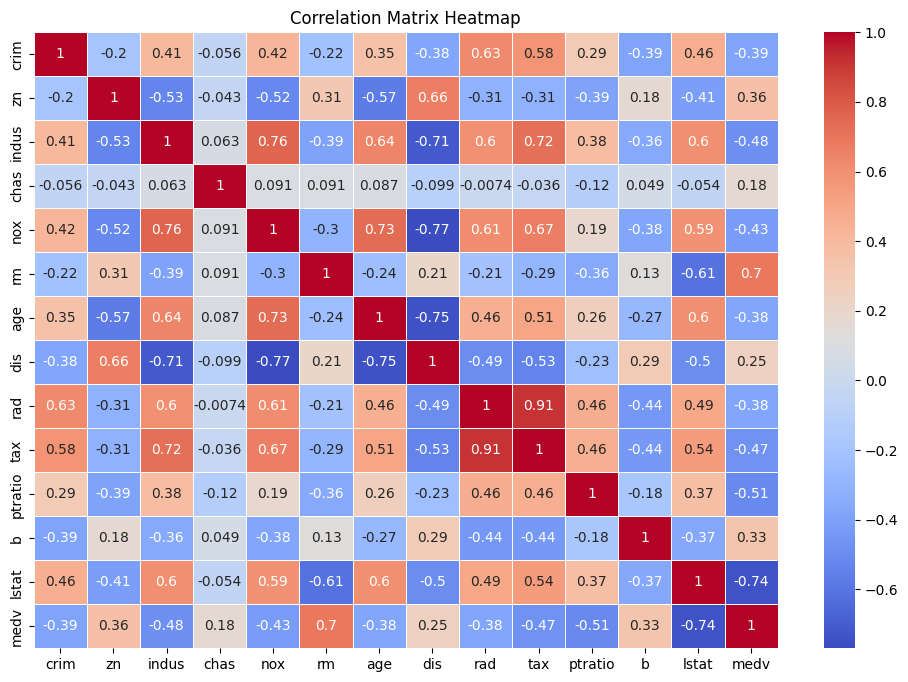

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
sel_feats=['zn','indus','nox','rm','tax','ptratio','b','lstat']
x=df[sel_feats]
y=df['medv']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [30]:
print('Shape of x_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (404, 8)
Shape of x_test (102, 8)
Shape of y_train (404,)
Shape of y_test (102,)


In [31]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [33]:
linear_pred=linear_model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score
lin_r2=r2_score(y_test,linear_pred)
print('Linear reg R2 score is: lin_r2')

Linear reg R2 score is: lin_r2


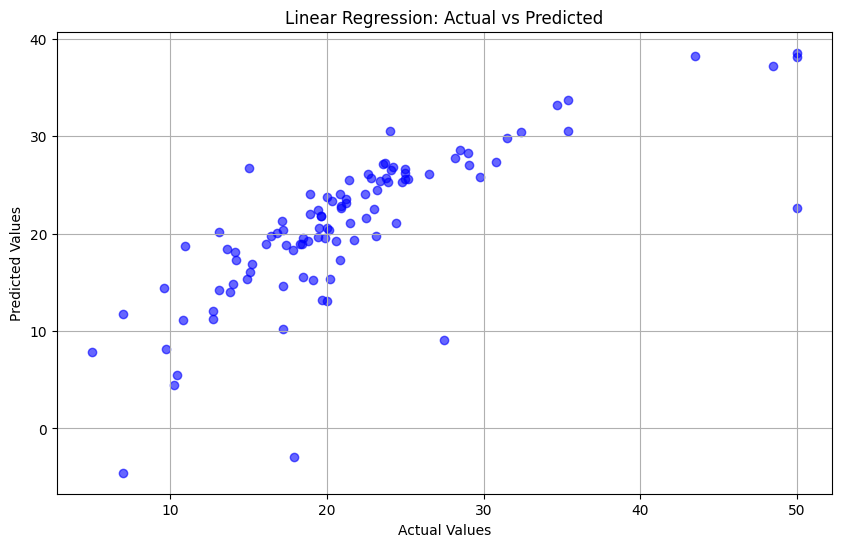

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,linear_pred, color='blue', alpha=0.6)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
